In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("data/2025-03-08 180000_30s_ppg")

<Axes: >

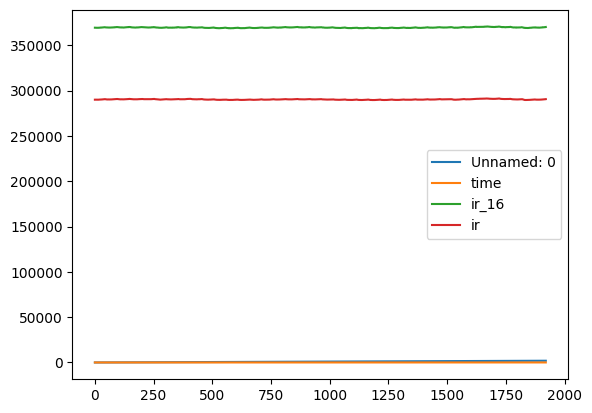

In [69]:
data.plot()

In [70]:
data["time"] = data["time"].astype(float)

<Axes: >

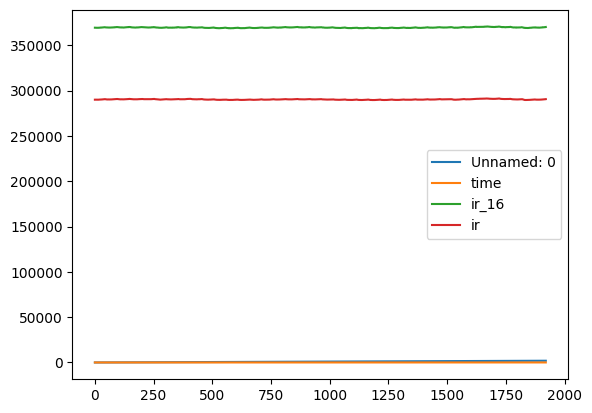

In [71]:
data.plot()

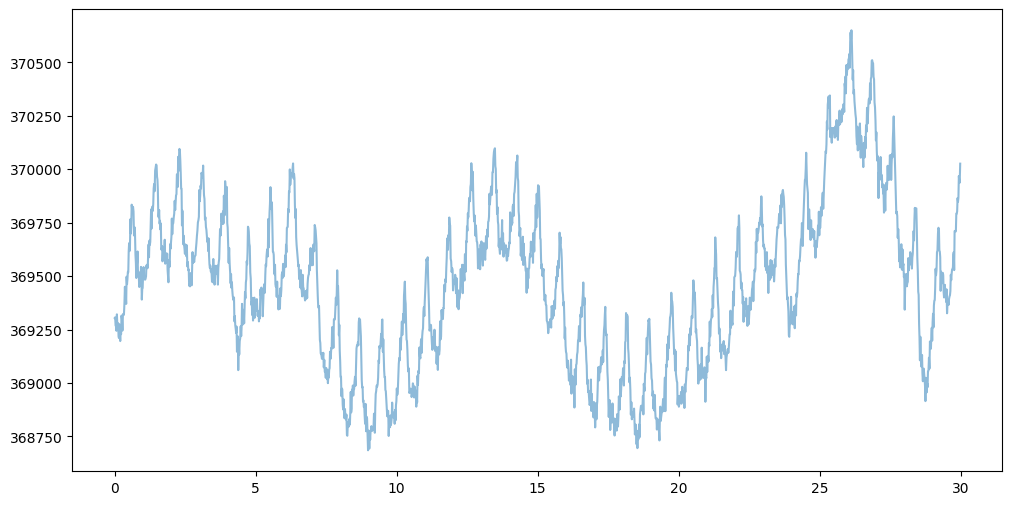

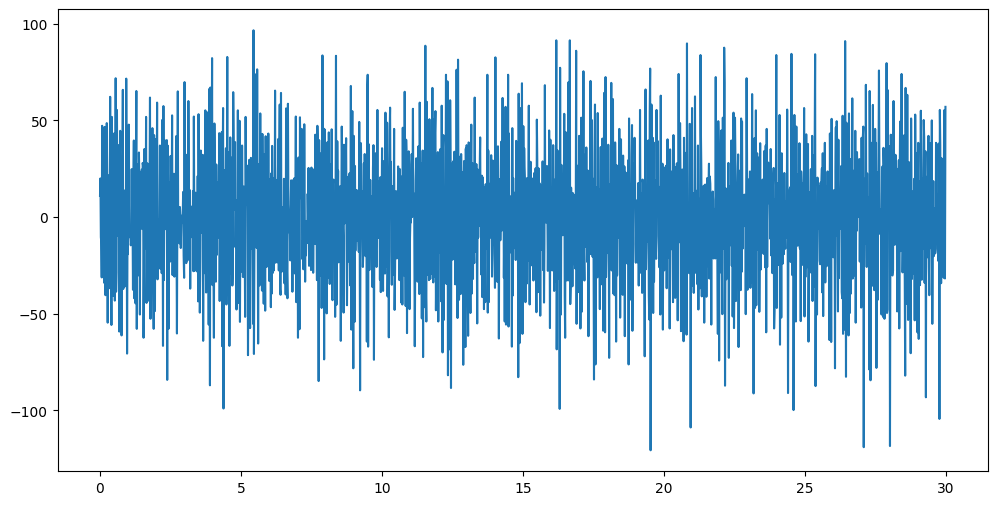

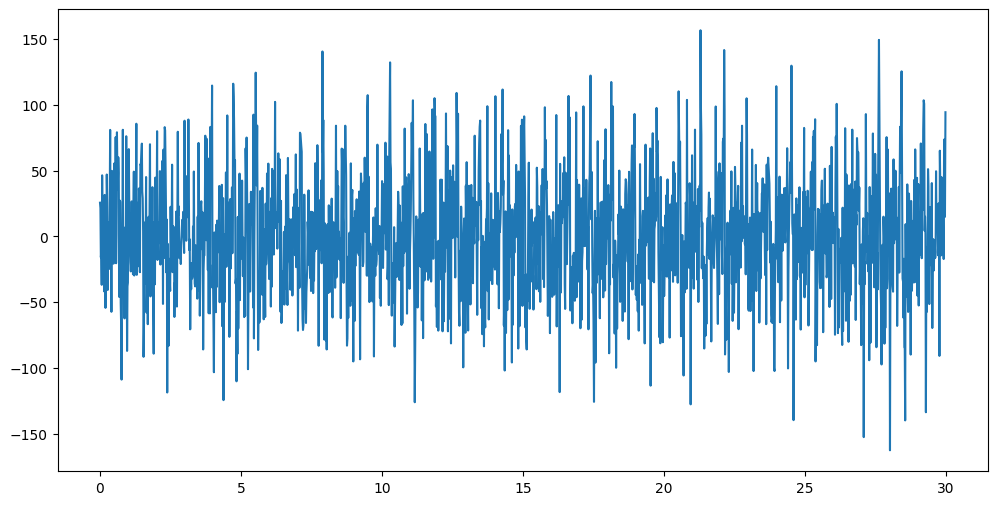

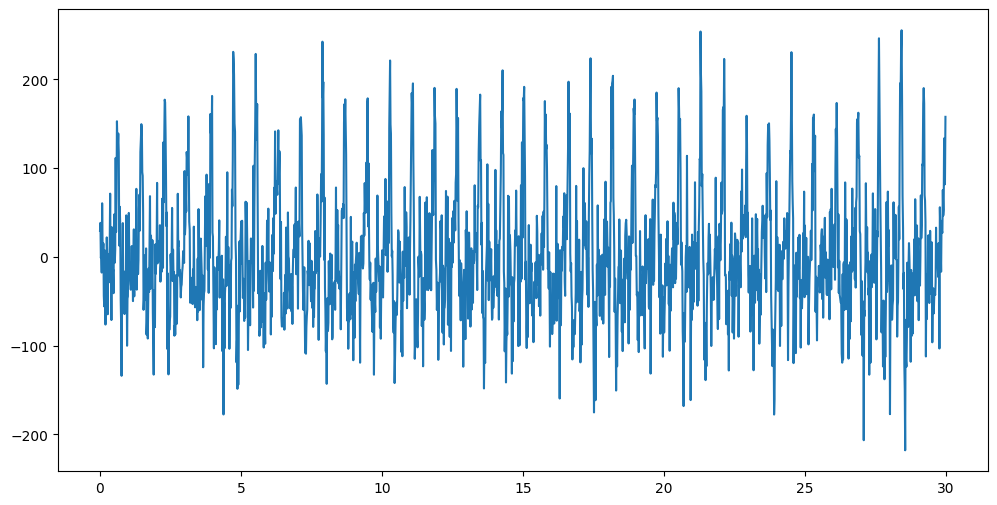

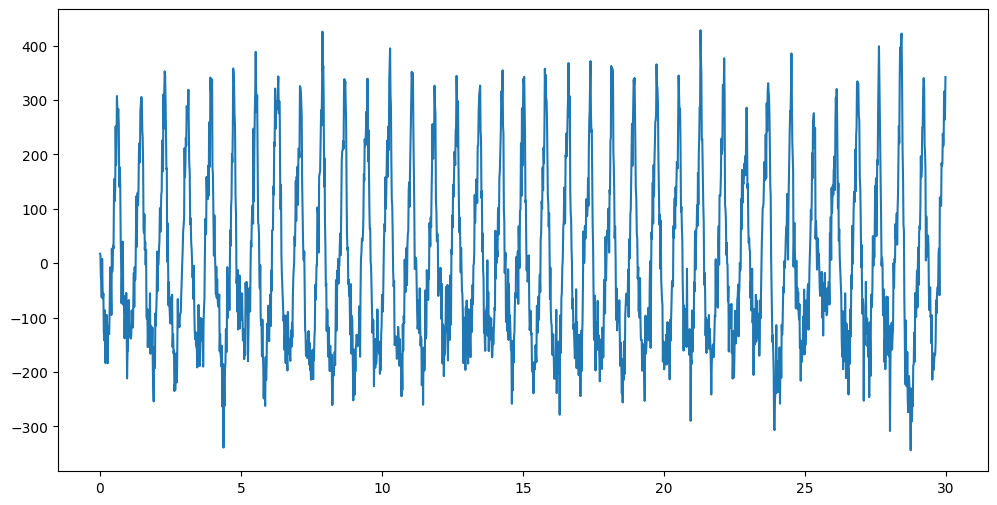

In [ ]:
import math

def moving_average(xx, size):
    b = np.ones(size)/size
    xx_mean = np.convolve(xx, b, mode="same")

    n_conv = math.ceil(size/2)

    xx_mean[0] *= size/n_conv
    for i in range(1, n_conv):
        xx_mean[i] *= size/(i+n_conv)
        xx_mean[-i] *= size/(i + n_conv - (size % 2))

    return xx_mean

# 異なる窓長を設定
window_sizes = [5, 10, 20, 50]

# フィルタ適用結果を保存
filtered_signals = {ws: moving_average(data['ir_16'], ws) for ws in window_sizes}

# 可視化
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['ir_16'], label='Original', alpha=0.5)
plt.show()
plt.close()

for ws in window_sizes:
    plt.figure(figsize=(12, 6))
    plt.plot(data['time'], data['ir_16'] - filtered_signals[ws], label=f'MA Window={ws}')
    plt.show()
    plt.close()

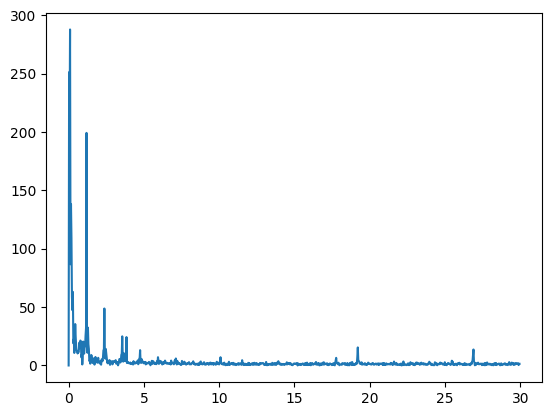

/home/soma/pro/lecture/ppg_denoise/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/soma/pro/lecture/ppg_denoise/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


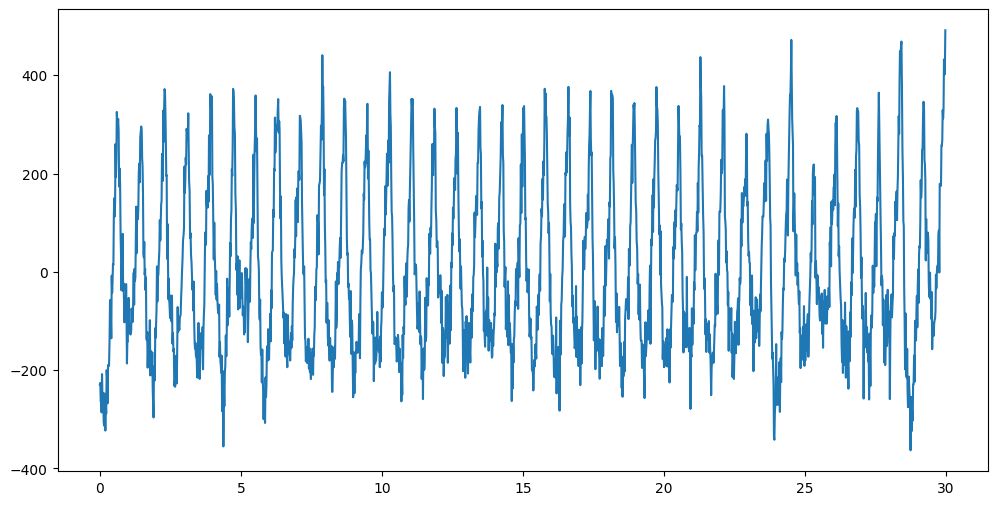

In [105]:
from scipy.fft import fft, ifft, fftfreq

y = fft(data["ir_16"])
x = fftfreq(len(data["ir_16"]), 1.0 / 60)[:len(data["ir_16"])//2]

plot_data = 2.0/len(data["ir_16"]) * np.abs(y[0:len(data["ir_16"])//2])
plot_data[0] = 0

freqdata = fftfreq(len(data["ir_16"]), 1.0 / 60)
lowcut = (-0.5 < freqdata) & (freqdata < 0.5)
highcut = (freqdata < -5) & (5 < freqdata)

plt.plot(x, plot_data)
plt.show()
plt.close()

y[lowcut] = 0
y[highcut] = 0

plt.figure(figsize=(12, 6))
plt.plot(data["time"], ifft(y))
plt.show()